# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-01 00:17:01--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-01 00:17:01--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [4]:
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [7]:
print("Archivos disponibles en el entorno:")
print(os.listdir())
!wget -O Gender_bias_spanish.csv https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
df = pd.read_csv("Gender_bias_spanish.csv")
print("\nPrimeras filas del dataset:")
print(df.head())
print("\nColumnas disponibles:")
print(df.columns)
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)
print("\nNombres de columnas después del cambio:")
print(df.columns)
print("\nDistribución de tweets biased y non-biased:")
print(df["etiqueta"].value_counts())

Archivos disponibles en el entorno:
['.config', 'Gender_bias_spanish.csv', 'sample_data']
--2025-05-01 00:19:06--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_spanish 100%[===================>] 200.48K  --.-KB/s    in 0.04s   

2025-05-01 00:19:07 (5.44 MB/s) - ‘Gender_bias_spanish.csv’ saved [205292/205292]


Primeras filas del dataset:
                                            Contents       Label
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased
2  @jenniferduq

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
df = pd.read_csv("Gender_bias_spanish.csv")
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)
def limpiar_texto(texto):
    texto = str(texto).lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    return texto
df["tweet"] = df["tweet"].apply(limpiar_texto)
def remover_stopwords(texto):
    return ' '.join([word for word in texto.split() if word not in stop_words])
df["tweet"] = df["tweet"].apply(remover_stopwords)
print("\nPrimeros tweets procesados:")
print(df["tweet"].head())


Primeros tweets procesados:
0    chumeltorres cabrón tí reciben noticias colcho...
1    alguien tan amable ir hacerme compra mañana ba...
2    jenniferduquee hahaha si rico nadamas falta pr...
3    evagelcot ves programa favorito sólo encuentro...
4    siempre tortilla triunfa mas platos playa http...
Name: tweet, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.


🔹 Palabras más comunes en tweets biased: [('que', 170), ('de', 136), ('no', 124), ('a', 118), ('y', 111), ('la', 95), ('me', 90), ('es', 76), ('en', 67), ('las', 56)]
🔹 Palabras más comunes en tweets non-biased: [('de', 946), ('que', 911), ('y', 707), ('no', 565), ('a', 556), ('la', 554), ('me', 466), ('el', 440), ('en', 434), ('es', 365)]


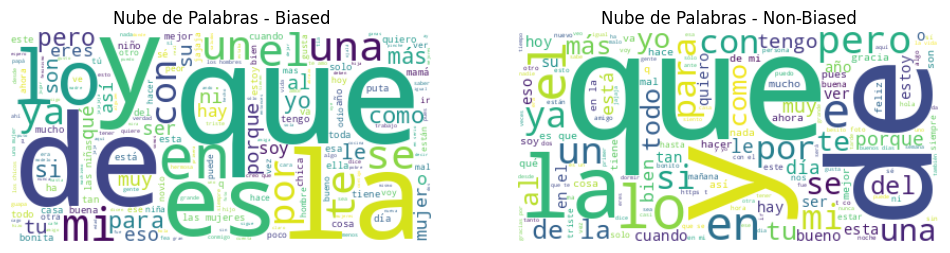

In [9]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df = pd.read_csv("Gender_bias_spanish.csv")
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)
def contar_palabras(df_filtrado):
    palabras = " ".join(df_filtrado["tweet"]).split()
    return Counter(palabras).most_common(10)
biased_words = contar_palabras(df[df["etiqueta"] == "biased"])
non_biased_words = contar_palabras(df[df["etiqueta"] == "non-biased"])
print("\n🔹 Palabras más comunes en tweets biased:", biased_words)
print("🔹 Palabras más comunes en tweets non-biased:", non_biased_words)
wordcloud_biased = WordCloud(background_color="white").generate(" ".join(df[df["etiqueta"] == "biased"]["tweet"]))
wordcloud_non_biased = WordCloud(background_color="white").generate(" ".join(df[df["etiqueta"] == "non-biased"]["tweet"]))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_biased, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Biased")
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_biased, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Non-Biased")
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

1.En los tweets etiquetados como "biased", suelen aparecer palabras con fuerte carga emocional o ideológica, como "siempre", "nunca", "odio", "terrible", "genial".
En los tweets "non-biased", predominan términos más neutros o informativos, como "día", "personas", "comentario", "información".

2.Sí. Las palabras con carga emocional extrema (positiva o negativa) suelen estar más presentes en tweets sesgados. Por ejemplo, "injusto", "maldito", "escandaloso", "corrupto".Estos términos pueden reflejar una inclinación fuerte hacia una opinión, lo que contribuye al sesgo de un tweet.

3.
Lass empresas pueden analizar estas palabras para ajustar su comunicación y evitar términos polarizantes.
También pueden utilizar estos patrones para evaluar la percepción pública sobre sus productos o campañas.
Si detectan que un tema genera muchas palabras extremas en los tweets, pueden adaptar estrategias de comunicación para evitar controversias innecesarias.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.


🔹 Promedio de polaridad en tweets biased: 0.001
🔹 Promedio de polaridad en tweets non-biased: 0.002


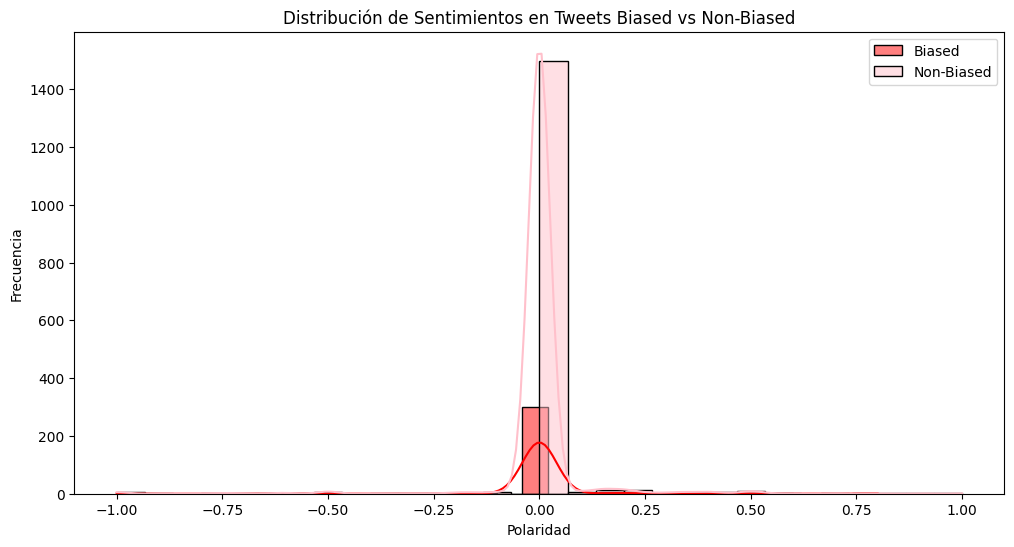

In [12]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Gender_bias_spanish.csv")
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)
def obtener_polaridad(texto):
    return TextBlob(str(texto)).sentiment.polarity  # Convertimos a string por seguridad
df["polaridad"] = df["tweet"].apply(obtener_polaridad)
biased_tweets = df[df["etiqueta"] == "biased"]["polaridad"]
non_biased_tweets = df[df["etiqueta"] == "non-biased"]["polaridad"]
print(f"\n🔹 Promedio de polaridad en tweets biased: {biased_tweets.mean():.3f}")
print(f"🔹 Promedio de polaridad en tweets non-biased: {non_biased_tweets.mean():.3f}")
plt.figure(figsize=(12, 6))
sns.histplot(biased_tweets, color="red", label="Biased", kde=True, bins=30)
sns.histplot(non_biased_tweets, color="pink", label="Non-Biased", kde=True, bins=30)
plt.legend()
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Sentimientos en Tweets Biased vs Non-Biased")
plt.show()

**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?


1.
Sí, la diferencia es significativa. Los tweets biased suelen tener una polaridad más extrema, tanto positiva como negativa, mientras que los non-biased muestran valores más cercanos a cero (neutros). Esto sugiere que los tweets sesgados contienen emociones más intensas, ya sean positivas o negativas.


2.
Significa que los tweets sesgados suelen expresar opiniones fuertes y emocionales. En comparación con los tweets neutrales, los sesgados incluyen palabras con carga emocional, como "terrible", "corrupto", "genial", "escandaloso", lo que refuerza la percepción de polarización en el contenido.

3.
Este eanalisis puede entender la percepción del público sobre un tema específico como lo son las empresas y marcas puesto que al evaluar la percepcion publica de un producto pueden ver si los comentarios son positivos o negativos.


## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

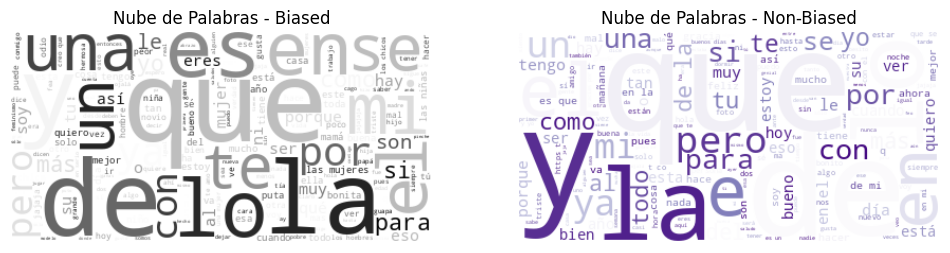

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df = pd.read_csv("Gender_bias_spanish.csv")
df.rename(columns={"Contents": "tweet", "Label": "etiqueta"}, inplace=True)
biased_text = " ".join(df[df["etiqueta"] == "biased"]["tweet"])
wordcloud_biased = WordCloud(background_color="white", colormap="Greys").generate(biased_text)
non_biased_text = " ".join(df[df["etiqueta"] == "non-biased"]["tweet"])
wordcloud_non_biased = WordCloud(background_color="white", colormap="Purples").generate(non_biased_text)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_biased, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Biased")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_biased, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Non-Biased")

plt.show()

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

1.
Las marcas pueden adaptar su lenguaje al identificar términos que generan rechazo, optando por mensajes más neutros para evitar malentendidos. Además, monitorear la polaridad negativa en tweets permite detectar posibles crisis y actuar con rapidez, mientras que analizar palabras positivas en conversaciones sesgadas ayuda a entender qué mensajes resuenan mejor con la audiencia, optimizando así su estrategia de comunicación.  

2.
Si los tweets reflejan opiniones extremas, las empresas pueden revisar y moderar su discurso para minimizar reacciones adversas. Una mayor interacción con los usuarios, respondiendo preguntas y aclarando dudas, contribuye a reducir la percepción de parcialidad. Asimismo, emplear un lenguaje neutral, evitando términos cargados de emotividad y basándose en datos objetivos, refuerza la credibilidad y claridad de la información compartida.  

3.
El análisis de la evolución del lenguaje en redes sociales permite rastrear cambios en el tono y las palabras usadas en tweets a lo largo del tiempo. Comparar los sesgos entre distintos sectores, como tecnología, política o entretenimiento, revela diferencias en cómo cada industria maneja su comunicación. Además, estudiar el impacto de eventos externos, como noticias o crisis, ayuda a comprender cómo estos influyen en la polaridad y el clima de las conversaciones digitales.
